In [3]:
%pylab inline
from scipy.optimize import curve_fit
import scipy.interpolate as interpolate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
def drawCurve(points , t):
    if(len(points) == 1):
        plt.plot(points[0])
    else:
        newpoints = []
        for i in range(0,len(points) - 1):
            x = (1-t) * points[i][0] + t * points[i+1][0]
            y = (1-t) * points[i][1] + t * points[i+1][1]
            poin = []
            poin.append(x)
            poin.append(y)
            newpoints.append(poin)
        drawCurve(newpoints, t)

def get_bezier_coef(points):
    # since the formulas work given that we have n+1 points
    # then n must be this:
    n = len(points) - 1

    # build coefficents matrix
    C = 4 * np.identity(n)
    np.fill_diagonal(C[1:], 1)
    np.fill_diagonal(C[:, 1:], 1)
    C[0, 0] = 2
    C[n - 1, n - 1] = 7
    C[n - 1, n - 2] = 2
    # build points vector
    P = [2 * (2 * points[i] + points[i + 1]) for i in range(n)]
    P[0] = points[0] + 2 * points[1]
    P[n - 1] = 8 * points[n - 1] + points[n]

    # solve system, find a & b
    A = np.linalg.solve(C, P)
    B = [0] * n
    for i in range(n - 1):
        B[i] = 2 * points[i + 1] - A[i + 1]
    B[n - 1] = (A[n - 1] + points[n]) / 2

    return A, B

# returns the general Bezier cubic formula given 4 control points
def get_cubic(a, b, c, d):
    return lambda t: np.power(1 - t, 3) * a + 3 * np.power(1 - t, 2) * t * b + 3 * (1 - t) * np.power(t, 2) * c + np.power(t, 3) * d

# return one cubic curve for each consecutive points
def get_bezier_cubic(points):
    A, B = get_bezier_coef(points)
    return [
        get_cubic(points[i], A[i], B[i], points[i + 1])
        for i in range(len(points) - 1)
    ]

# evalute each cubic curve on the range [0, 1] sliced in n points
def evaluate_bezier(points, n):
    curves = get_bezier_cubic(points)
    return np.array([fun(t) for fun in curves for t in np.linspace(0, 1, n)])

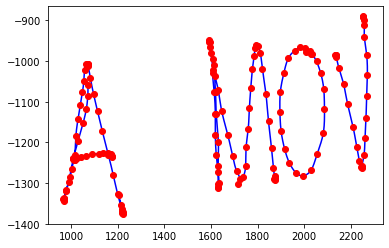

In [5]:
dd = pd.read_excel("C:\\Users\\RAJAT BHARDWAJ\\Desktop\\project\\datafile.xls")
prev = 0;
curr = 0;
start = 0;
time = 0;
for i in dd.index:
    if(dd.loc[i].X_value == '\n'):
        curr = i;
        d1 = dd[prev:curr]
        #rgb = (random.random(),random.random(),random.random())
        #plt.plot(d1.X_value.astype(int),-1*d1.Y_value.astype(int),c=numpy.random.rand(3,))
        prev = curr + 1
        
        points = []

        x_points = []
        x_points.append(d1.X_value.astype(int))
        y_points = []
        y_points.append(d1.Y_value.astype(int))
        
        length = prev
        for j in range(start,length-1):
            each = []
            each.append(x_points[0][j])
            each.append(y_points[0][j])
            points.append(each)

        poin = np.array(points)
        path = evaluate_bezier(poin, 50)

        # extract x & y coordinates of points
        x, y = poin[:,0], poin[:,1]
        px, py = path[:,0], path[:,1]

        # plot
        plt.plot(px, -1*py, 'b-')
        plt.plot(x, -1*y, 'ro')
        start = prev;
        if(time == 4):
            break
        time = time + 1
plt.show()